# SpGRUModel Demo

## Install and Include programs and modules

In [8]:
import pandas
from matplotlib.pyplot import plot,stem
from numpy import append,sin,pi,linspace
from SpGRUModel import SpGRUModel
from SpGRUPredictor import SpGRUPredictor
from LagEstimate import LagEstimate

## Setup some parameters

In [2]:
t = linspace(0,10,1001)
data = sin(2*pi*t)
Lag = LagEstimate(data,10)
sp = 0.2
nn = 16
ep = 60
md = data.min()
Md = abs(data - md).max()
N = 880
spp = 1e-5

## Compute model

In [77]:
TS_Model,H,h = SpGRUModel(data,Lag,sp,nn,ep,spp)

## Compute predictions

In [76]:
X = SpGRUPredictor(data,TS_Model,h,N)

## Plot predictions

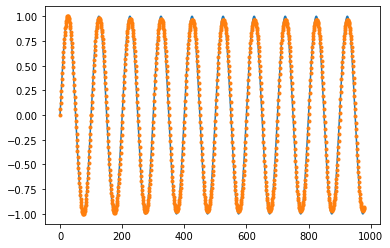

In [7]:
plot(data[:len(X)]),plot(X,'.');

## Get Weights

In [75]:
TS_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 16)                5664      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 5,681
Trainable params: 5,681
Non-trainable params: 0
_________________________________________________________________


<StemContainer object of 3 artists>

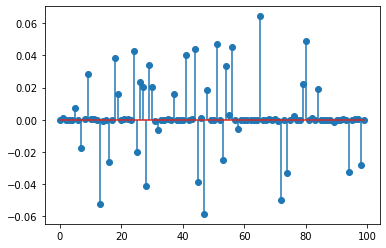

In [13]:
layers = TS_Model.layers
W = layers[0].get_weights()
stem(W[0][:,17])

## Compare to Linear Model Component

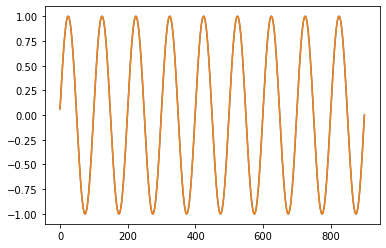

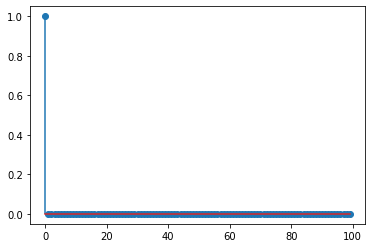

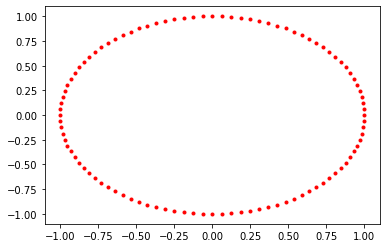

In [78]:
from numpy import sin,pi,arange,append,ceil,fliplr,roots,array,reshape,zeros,real,imag
import matplotlib.pyplot as plt
from SpAutoRegressor import SpAutoRegressor
from SPARPredictor import SPARPredictor
from LagEstimate import LagEstimate
t = arange(0,10,.01)
t = append(t,10)
x = sin(2*pi*t)
mx = x.min()
Mx = abs(x-mx).max()
xs = 2*(x-mx)/Mx-1
sampling_proportion = 0.2
L0 = int(ceil(sampling_proportion*len(xs)))
Lag = LagEstimate(xs[:L0],1)
steps = 800
A,h = SpAutoRegressor(xs,1/len(xs),sampling_proportion,1,Lag,1e-1,1e-1)
y = Mx*(SPARPredictor(A,h,steps)+1)/2+mx
L0 = int(ceil(sampling_proportion*len(xs)))
plt.plot(x[(L0-Lag):L0+steps]),plt.plot(y)
plt.show()
plt.stem(A)
plt.show()
A = reshape(A,(1,len(A)))
p = zeros((1,A.shape[1]+1))
p[0,0] = 1
p[0,1:] = -fliplr(A)
r = roots(reshape(p,(p.shape[1],)))
plt.plot(real(r),imag(r),'r.')